### Hari Thapliyal
### Sat, 23-Jul-22
### Transfer Learning using Keras

# Loading Keras Library

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [ ]:
# example of using a pre-trained model as a classifier
path = r'/content/drive/MyDrive/DS-Data/images'
# load an image from file
image = load_img( path+"/" +'airplane.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

airliner (83.98%)


In [ ]:
image.shape

(1, 224, 224, 3)

# VGG Retraining

In [ ]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
# ...

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

In [ ]:
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))
# mark some layers as not trainable
model.get_layer('block1_conv1').trainable = False
model.get_layer('block1_conv2').trainable = False
model.get_layer('block2_conv1').trainable = False
model.get_layer('block2_conv2').trainable = False
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
# https://towardsdatascience.com/how-to-predict-an-image-with-keras-ca97d9cd4817

# Resnet50

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl

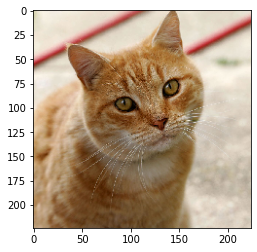

In [ ]:
import matplotlib.pyplot as plt
img_path = r'/content/drive/MyDrive/DS-Data/images/Cat03.jpg'
plt.imshow(img)
plt.show()

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

model = tf.keras.applications.resnet50.ResNet50()

In [ ]:
prediction = model.predict(img_preprocessed)
print(decode_predictions(prediction, top=3)[0])

[('n02123159', 'tiger_cat', 0.3937546), ('n02124075', 'Egyptian_cat', 0.35070857), ('n02123045', 'tabby', 0.2051763)]


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_12[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

# VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 7s 0us/step


In [ ]:
#VGG Model is 5 times bulky. 102,973,440 - 553,467,904

-450494464

In [ ]:
prediction = model.predict(img_preprocessed)
print(decode_predictions(prediction, top=3)[0])

[('n02123159', 'tiger_cat', 0.41843045), ('n02124075', 'Egyptian_cat', 0.36165443), ('n02123045', 'tabby', 0.12628837)]


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Inception v3

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

96124928/96112376 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
img = image.load_img(img_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

model = tf.keras.applications.inception_v3.InceptionV3()

In [ ]:
prediction = model.predict(img_preprocessed)
print(decode_predictions(prediction, top=3)[0])

[('n02123159', 'tiger_cat', 0.8339414), ('n02123045', 'tabby', 0.11365157), ('n02124075', 'Egyptian_cat', 0.009311143)]


# EfficientNetB6

In [ ]:
model = tf.EfficientNetB6()

174473216/174460376 [==============================] - 2s 0us/step


In [ ]:
model.summary()

In [ ]:
img = image.load_img(img_path, target_size=(528, 528))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_batch)

In [ ]:
print(decode_predictions(prediction, top=3)[0])

[('n02123159', 'tiger_cat', 0.57908964), ('n02123045', 'tabby', 0.13017003), ('n02124075', 'Egyptian_cat', 0.09904018)]


# Xception

In [ ]:
model = tf.Xception()

91897856/91884032 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
img = image.load_img(img_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_batch)

In [ ]:
print(decode_predictions(prediction, top=3)[0])

[('n03775546', 'mixing_bowl', 1.0), ('n04127249', 'safety_pin', 5.4969247e-31), ('n04116512', 'rubber_eraser', 4.782697e-33)]


# MobileNetV3Small

In [ ]:
model = tf.MobileNetV3Small()

10747904/10734624 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_1 (Rescaling)        (None, None, None,   0           ['input_17[0][0]']               
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_1[0][0]']            
                                16)                                                

In [ ]:
img = image.load_img(img_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_batch)

In [ ]:
print(decode_predictions(prediction, top=3)[0])

[('n02123159', 'tiger_cat', 0.3658943), ('n02124075', 'Egyptian_cat', 0.3332257), ('n02123045', 'tabby', 0.05131978)]


# MobileNetV3Large

In [ ]:
model = tf.MobileNetV3Large()

22675456/22661472 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_18[0][0]']               
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_2[0][0]']            
                                16)                                                

In [ ]:
img = image.load_img(img_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_batch)

In [ ]:
print(decode_predictions(prediction, top=3)[0])

[('n02123159', 'tiger_cat', 0.47096542), ('n02124075', 'Egyptian_cat', 0.21017438), ('n02123045', 'tabby', 0.15625277)]


# All Trained Models in Keras

In [ ]:
import tensorflow.keras.applications as tf

dir(tf)

['DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'EfficientNetV2B0',
 'EfficientNetV2B1',
 'EfficientNetV2B2',
 'EfficientNetV2B3',
 'EfficientNetV2L',
 'EfficientNetV2M',
 'EfficientNetV2S',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'VGG16',
 'VGG19',
 'Xception',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'densenet',
 'efficientnet',
 'efficientnet_v2',
 'imagenet_utils',
 'inception_resnet_v2',
 'inception_v3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3',
 'nasnet',
 'resnet',
 'resnet50',
 'resnet_v2',
 'vgg16',
 'vgg19',
 'xception']